In [268]:
#Importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [269]:
#cargamos archivo
Data = pd.read_csv('./Titanic-Dataset.csv')

In [270]:
# Mostramos informacion de archivo
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [271]:
#Realice la eliminacion de estas columnas debido a que no creo que sean reñevantes para el caluclo de sobrevivientes
Data = Data.drop ('Name', axis = 1)
Data = Data.drop ('Ticket', axis = 1)
Data = Data.drop ('Cabin', axis = 1)
Data = Data.drop ('Embarked', axis = 1)

In [272]:
# Mostramos informacion de archivo
Data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,0.0,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [273]:
#validamos valores en ceros que pueden ser importantes
print("Cantidad de Registros con cero en Edad: ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero de Sexo: ",Data['Sex'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  177
Cantidad de Registros con cero de Sexo:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

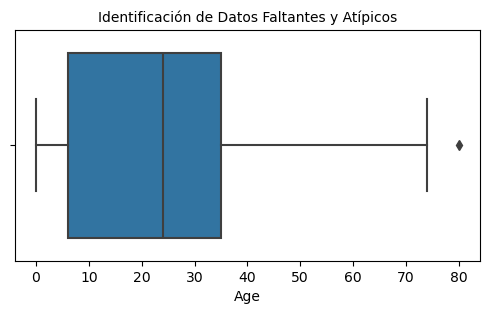

In [274]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [275]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
Data['Age']=Data['Age'].replace(0,Data['Age'].mean())

In [276]:
print("Cantidad de Registros con cero en Edad: ",Data['Age'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0


In [277]:
#cambiamos el dato de sex 1 :Femenino 2: Masculino
Data['Sex']=Data['Sex'].replace('female',1)
Data['Sex']=Data['Sex'].replace('male',2)

In [278]:
Data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,2,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,2,35.000000,0,0,8.0500
5,6,0,3,2,23.799293,0,0,8.4583
6,7,0,1,2,54.000000,0,0,51.8625
7,8,0,3,2,2.000000,3,1,21.0750
8,9,1,3,1,27.000000,0,2,11.1333
9,10,1,2,1,14.000000,1,0,30.0708


In [279]:
#Descripcinn de los datos
Data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.647587,28.527099,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.213618,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,2.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200


In [280]:
#Cantidad de personas que sobrevivieron 0 = no sobrevivio, 1 = sobrevivio
Data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [281]:
X = Data.drop('Survived',axis=1) # Se generan datos sin el la informacion de condition
Y = Data['Survived'] # Se generan los datos solo con la informacion del campo condition

#Separamos el dataset en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

In [282]:
#Imprimos lo generado para verificar en train
print (X_train)

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare
502          503       3    1  23.799293      0      0   7.6292
464          465       3    2  23.799293      0      0   8.0500
198          199       3    1  23.799293      0      0   7.7500
765          766       1    1  51.000000      1      0  77.9583
421          422       3    2  21.000000      0      0   7.7333
..           ...     ...  ...        ...    ...    ...      ...
131          132       3    2  20.000000      0      0   7.0500
490          491       3    2  23.799293      1      0  19.9667
528          529       3    2  39.000000      0      0   7.9250
48            49       3    2  23.799293      2      0  21.6792
80            81       3    2  22.000000      0      0   9.0000

[712 rows x 7 columns]


In [283]:
#Imprimos lo generado para verificar en test
print (Y_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


In [284]:
#regresion logística 
regresion = LogisticRegression(solver = "liblinear") 
regresion.fit (X_train , Y_train)   
# Crea el modelo de prediccion
Prediccion = regresion.predict(X_test) 

In [285]:
print (Y_test)

153    0
752    0
610    0
200    0
310    1
      ..
96     0
440    1
75     0
575    0
143    0
Name: Survived, Length: 179, dtype: int64


In [286]:
print (Prediccion)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0]


In [287]:
# reporte del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



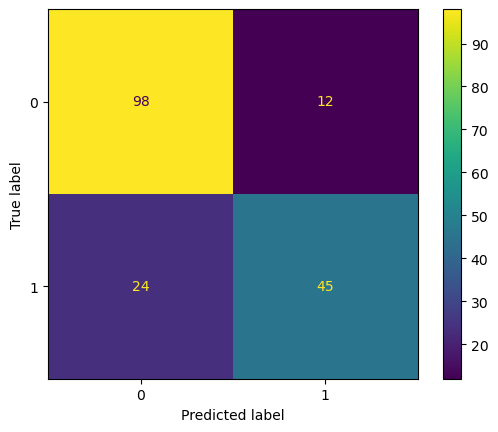

In [288]:
#Matrix de Confusinn del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()